In [83]:
import pandas as pd
df = pd.read_csv("D:\DA_ASSIGNMENT\PROJECT\project.csv",parse_dates =["date"],index_col ="date")

In [ ]:
#we will build a naive bayes classifier for classifying desc into type categories.

In [109]:
#we will add a column encoding the type as an integer because categorical variables are often better represented by integers than strings.
#We also create a couple of dictionaries for future use.
from io import StringIO
#remove rows with nan values in desc column
df = df[pd.notnull(df['desc'])]
#encoding the type categorical variable type and adding a new column 
df['type_id'] = df['type'].factorize()[0]
type_id_df = df[['type', 'type_id']].drop_duplicates().sort_values('type_id')
type_to_id = dict(type_id_df.values)
id_to_category = dict(type_id_df[['type_id', 'type']].values)

In [110]:
#we will drop unwanted columns
df1=df.drop(columns=['id','month','hour'])

In [111]:
#selecting only  those features that are required 
df1=df1[['type','desc','type_id']]

In [87]:
df1

,type,desc,type_id
date,,,
2008-09-19,WEAPONS,ILLEGAL POSSESS TEAR GAS/ETC,0
2008-07-20,FRAUD,FRAUD,1
2009-05-25,ASSAULT,BATTERY WITH SERIOUS BODILY INJURY,2
2011-04-22,DRUGS/ALCOHOL VIOLATIONS,POSSESS NARCOTIC CONTROLLED SUBSTANCE,3
2012-05-12,ASSAULT,BATTERY WITH SERIOUS BODILY INJURY (F),2
2010-12-21,ROBBERY,COMMERCIAL ROBBERY - WEAPON USED,4
2009-09-23,SEX CRIMES,PROSTITUTION,5
2008-10-12,BURGLARY,RESIDENTIAL BURGLARY,6
2008-06-06,VEHICLE BREAK-IN/THEFT,VEHICLE BREAK-IN/THEFT,7


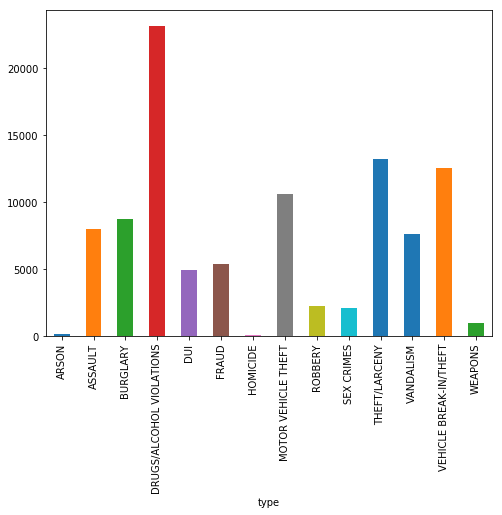

In [88]:
#to check if the classes are imbalanced
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df1.groupby('type').desc.count().plot.bar(ylim=0)
plt.show()

In [89]:
#The above graph shows that the desc is more biased therefore standard algorithms will not work
#but in text classification we need maximum accuracy therefore we leave it as it is

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer
#to extract features we should take into account each word therefore we will consider tf-idf for this reason.
#subliear_tf = True is to use logarithmic form for frequency.
#min_df = 2  is the minimum numbers of documents a word must be present in to be kept.
#norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
#ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df1.desc).toarray()
labels = df1.type_id
features.shape

(99992, 1009)

In [113]:
#this indicates that 99992 desc is represented by 1009 features

In [114]:
#we will find the terms that are the most correlated with each of the products:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for type, type_id in sorted(type_to_id.items()):
  features_chi2 = chi2(features, labels == type_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(type))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'ARSON':
  . Most correlated unigrams:
. structure
. arson
  . Most correlated bigrams:
. structure forest
. arson property
# 'ASSAULT':
  . Most correlated unigrams:
. injury
. battery
  . Most correlated bigrams:
. bodily injury
. battery bodily
# 'BURGLARY':
  . Most correlated unigrams:
. residential
. burglary
  . Most correlated bigrams:
. commercial burglary
. residential burglary
# 'DRUGS/ALCOHOL VIOLATIONS':
  . Most correlated unigrams:
. disorderly
. conduct
  . Most correlated bigrams:
. conduct alcohol
. disorderly conduct
# 'DUI':
  . Most correlated unigrams:
. drugs
. dui
  . Most correlated bigrams:
. alcohol drugs
. dui alcohol
# 'FRAUD':
  . Most correlated unigrams:
. theft
. fraud
  . Most correlated bigrams:
. break theft
. vehicle break
# 'HOMICIDE':
  . Most correlated unigrams:
. specified
. murder
  . Most correlated bigrams:
. murder degree
. degree specified
# 'MOTOR VEHICLE THEFT':
  . Most correlated unigrams:
. owner
. consent
  . Most correlated bigram

In [115]:
#The above are most correlated unigram and bigrams for each type.

In [94]:
#training the naive bayes model
#we will use multinomial naive bayes classifier since it is a multiclass classification.
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df1['desc'], df1['type'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [116]:
# The following some rows are used for checking the prediction by giving various inputs to the above trained model 
print(clf.predict(count_vect.transform(['Residential Burglary'])))

['BURGLARY']


In [117]:
print(clf.predict(count_vect.transform(['Battery with serious body injury'])))

['ASSAULT']


In [118]:
print(clf.predict(count_vect.transform(['Disorderly conduct alcohol'])))

['DRUGS/ALCOHOL VIOLATIONS']


In [119]:
print(clf.predict(count_vect.transform(['illegal possess tear gas'])))

['WEAPONS']


In [120]:
print(clf.predict(count_vect.transform(["TAKE VEHICLE W/O OWNER'S CONSENT/VEHICLE THEFT"])))

['MOTOR VEHICLE THEFT']


In [121]:
#testing the trained model by giving X_test part of the splitted dataset 
y_pred=clf.predict(count_vect.transform([x for x in X_test]))

In [122]:
len(y_pred)

24998

In [123]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9878390271221698


In [124]:
len(X_train)

74994

In [126]:
#total number of rows => 74994+24998 =99992 therefore it is completely tested and successful.